In [ ]:
import sys
print(sys.executable)
!{sys.executable} -m pip install scikit-learn

c:\Users\zln92\AppData\Local\Programs\Python\Python310\python.exe
     ---------------------------------------- 10.6/10.6 MB 1.7 MB/s eta 0:00:00
     ------------------------------------ 301.8/301.8 kB 549.1 kB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import time

# Define transformations and load datasets
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = datasets.ImageFolder(root='archive/train', transform=transform)
test_dataset = datasets.ImageFolder(root='archive/test', transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Check for device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define the model and move it to device
class FERModel(nn.Module):
    def __init__(self):
        super(FERModel, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.to_transformer_dim = nn.Linear(64 * 12 * 12, 512)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=3)
        self.fc_layer = nn.Linear(512, 7)

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.to_transformer_dim(x)
        x = x.unsqueeze(1)
        x = self.transformer_encoder(x)
        x = torch.flatten(x, 1)
        x = self.fc_layer(x)
        return x

model = FERModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with CUDA
for epoch in range(20):
    epoch_start = time.time()
    train_loss = 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/20', unit='batch'):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    epoch_duration = time.time() - epoch_start
    print(f'Epoch [{epoch+1}/20], Loss: {train_loss/len(train_loader):.4f}, Time: {epoch_duration:.2f} sec')


Using device: cuda


Epoch 1/20: 100%|██████████| 898/898 [01:34<00:00,  9.49batch/s]


Epoch [1/20], Loss: 1.8549, Time: 94.64 sec


Epoch 2/20: 100%|██████████| 898/898 [00:20<00:00, 43.93batch/s]


Epoch [2/20], Loss: 1.8181, Time: 20.44 sec


Epoch 3/20: 100%|██████████| 898/898 [00:20<00:00, 44.23batch/s]


Epoch [3/20], Loss: 1.8154, Time: 20.31 sec


Epoch 4/20: 100%|██████████| 898/898 [00:20<00:00, 43.81batch/s]


Epoch [4/20], Loss: 1.8147, Time: 20.50 sec


Epoch 5/20: 100%|██████████| 898/898 [00:20<00:00, 44.13batch/s]


Epoch [5/20], Loss: 1.8137, Time: 20.35 sec


Epoch 6/20: 100%|██████████| 898/898 [00:20<00:00, 43.27batch/s]


Epoch [6/20], Loss: 1.8132, Time: 20.76 sec


Epoch 7/20: 100%|██████████| 898/898 [00:22<00:00, 39.99batch/s]


Epoch [7/20], Loss: 1.8138, Time: 22.46 sec


Epoch 8/20: 100%|██████████| 898/898 [00:21<00:00, 41.09batch/s]


Epoch [8/20], Loss: 1.8138, Time: 21.85 sec


Epoch 9/20: 100%|██████████| 898/898 [00:24<00:00, 37.31batch/s]


Epoch [9/20], Loss: 1.8135, Time: 24.07 sec


Epoch 10/20: 100%|██████████| 898/898 [00:22<00:00, 40.22batch/s]


Epoch [10/20], Loss: 1.8131, Time: 22.33 sec


Epoch 11/20: 100%|██████████| 898/898 [00:22<00:00, 40.45batch/s]


Epoch [11/20], Loss: 1.8128, Time: 22.20 sec


Epoch 12/20: 100%|██████████| 898/898 [00:22<00:00, 39.60batch/s]


Epoch [12/20], Loss: 1.8131, Time: 22.68 sec


Epoch 13/20: 100%|██████████| 898/898 [02:20<00:00,  6.38batch/s]


Epoch [13/20], Loss: 1.8122, Time: 140.79 sec


Epoch 14/20: 100%|██████████| 898/898 [00:25<00:00, 34.62batch/s]


Epoch [14/20], Loss: 1.8121, Time: 25.94 sec


Epoch 15/20: 100%|██████████| 898/898 [00:19<00:00, 44.99batch/s]


Epoch [15/20], Loss: 1.8131, Time: 19.96 sec


Epoch 16/20: 100%|██████████| 898/898 [00:19<00:00, 46.09batch/s]


Epoch [16/20], Loss: 1.8124, Time: 19.48 sec


Epoch 17/20: 100%|██████████| 898/898 [00:19<00:00, 46.20batch/s]


Epoch [17/20], Loss: 1.8124, Time: 19.44 sec


Epoch 18/20: 100%|██████████| 898/898 [00:19<00:00, 46.14batch/s]


Epoch [18/20], Loss: 1.8118, Time: 19.46 sec


Epoch 19/20: 100%|██████████| 898/898 [00:19<00:00, 46.22batch/s]


Epoch [19/20], Loss: 1.8114, Time: 19.43 sec


Epoch 20/20: 100%|██████████| 898/898 [00:20<00:00, 44.33batch/s]

Epoch [20/20], Loss: 1.8120, Time: 20.26 sec


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_loader is your DataLoader for the test dataset
true_labels = []
predicted_labels = []
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy:.2f}')


Overall Accuracy: 0.25


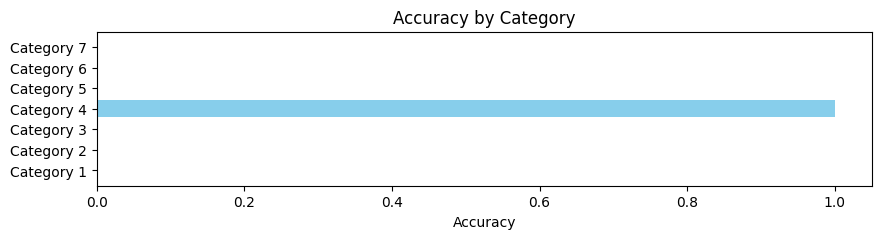

In [ ]:
import numpy as np

category_accuracies = []
for i in range(7):
    category_mask = (np.array(true_labels) == i)
    category_acc = accuracy_score(np.array(true_labels)[category_mask], np.array(predicted_labels)[category_mask])
    category_accuracies.append(category_acc)

# Plotting category accuracies
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the size as needed
ax.barh(range(7), category_accuracies, color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_yticks(range(7))
ax.set_yticklabels(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7'])
ax.set_title('Accuracy by Category')
plt.show()

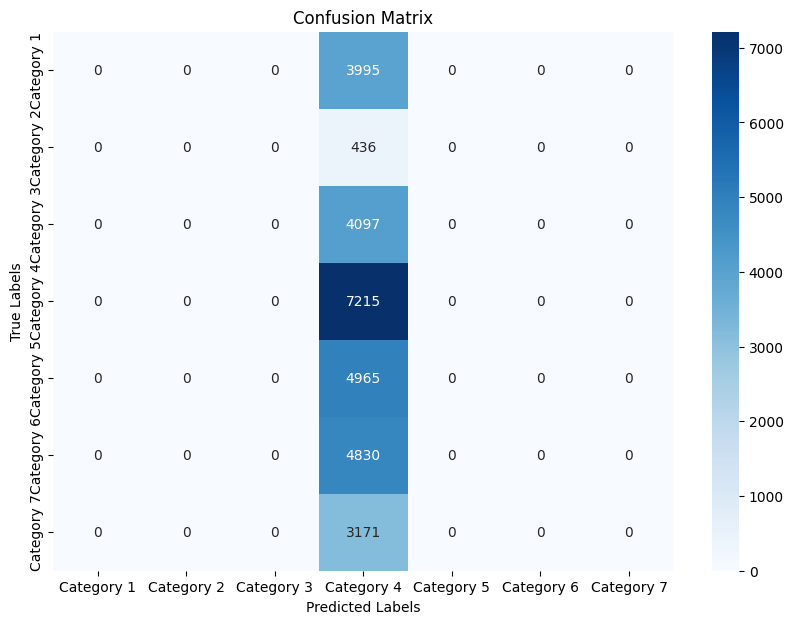

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7'], yticklabels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a047d2a-49ae-49e7-9442-011956428446' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>